In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
dataset = pd.read_excel('Adidas Dataset.xlsx')
dataset = dataset.drop(['Retailer ID','Invoice Date'], axis = 1)
dataset.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [67]:
encoder = LabelEncoder()
Categorical_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']
for column in Categorical_columns:
    dataset[column] = encoder.fit_transform(dataset[column])
dataset.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,1,31,35,2,50.0,1200,600000.0,300000.0,0.50,0
1,1,1,31,35,1,50.0,1000,500000.0,150000.0,0.30,0
2,1,1,31,35,5,40.0,1000,400000.0,140000.0,0.35,0
3,1,1,31,35,4,45.0,850,382500.0,133875.0,0.35,0
4,1,1,31,35,0,60.0,900,540000.0,162000.0,0.30,0


In [68]:
for k in range(2, 8):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(x)
    score = silhouette_score(x, model.labels_)
    print(f'K={k}, Silhouette Score={score:.3f}')

K=2, Silhouette Score=0.761
K=3, Silhouette Score=0.760
K=4, Silhouette Score=0.751
K=5, Silhouette Score=0.752
K=6, Silhouette Score=0.748
K=7, Silhouette Score=0.742


In [71]:
x = dataset

model = KMeans(n_clusters=3, random_state=0)
y_means = model.fit(x)

labels = model.labels_
centers = model.cluster_centers_
dataset['Cluster'] = labels

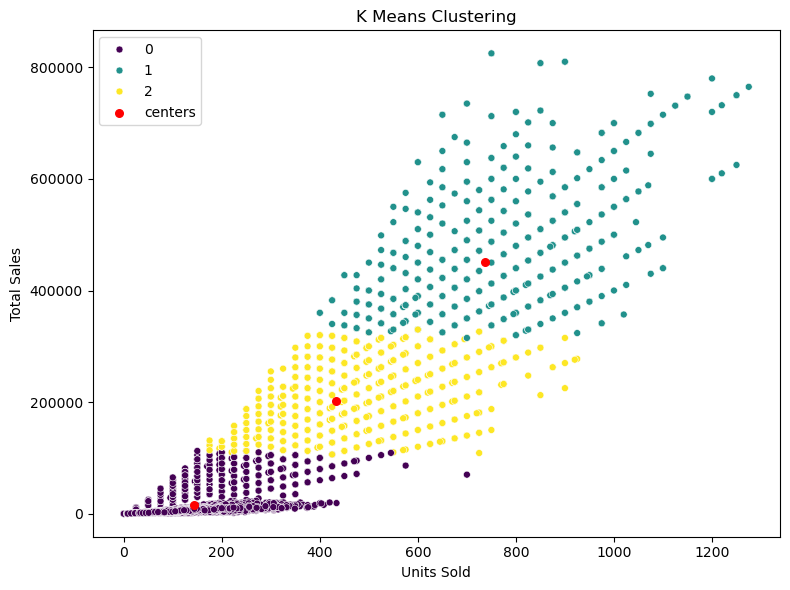

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = dataset['Units Sold'], y = dataset['Total Sales'], hue = dataset['Cluster'], palette = 'viridis', s = 25)
plt.scatter(centers[:, list(x.columns).index('Units Sold')], centers[:, list(x.columns).index('Total Sales')], c = 'red', marker = 'o', s = 30, label = 'centers')
plt.title('K Means Clustering')
plt.xlabel('Units Sold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

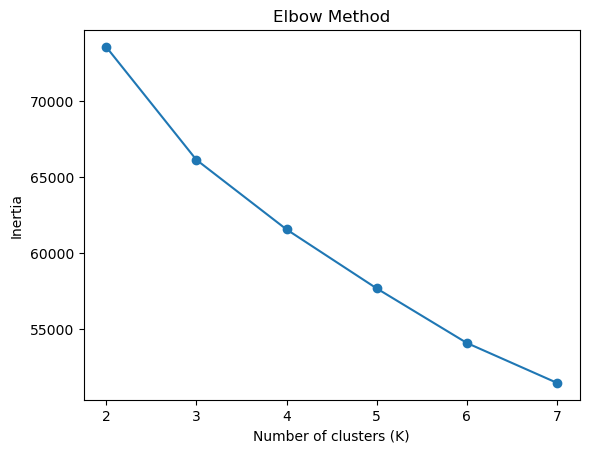

K=2, Silhouette Score=0.277
K=3, Silhouette Score=0.153
K=4, Silhouette Score=0.132
K=5, Silhouette Score=0.142
K=6, Silhouette Score=0.133
K=7, Silhouette Score=0.131
Adjusted Rand Index: 0.053


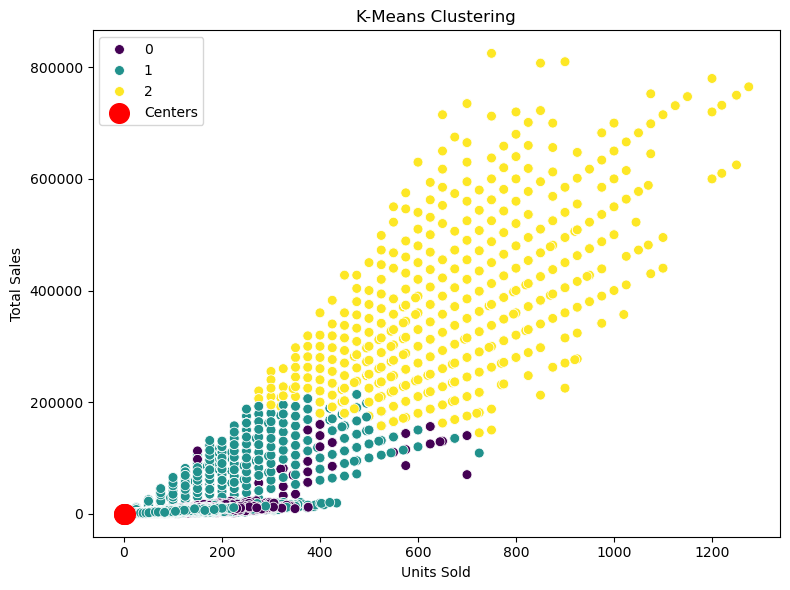

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load dataset
dataset = pd.read_excel('Adidas Dataset.xlsx')
dataset = dataset.drop(['Retailer ID', 'Invoice Date'], axis=1)

# Save the original Sales Method for later comparison
true_labels = dataset['Sales Method']

# Encode categorical columns (except Sales Method)
encoder = LabelEncoder()
categorical_columns = ['Retailer', 'Region', 'State', 'City', 'Product']
for column in categorical_columns:
    dataset[column] = encoder.fit_transform(dataset[column])

# Features for clustering (drop Sales Method)
X = dataset.drop(['Sales Method'], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Elbow Method
inertia = []
K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 2: Silhouette Scores
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

# Step 3: Choose K (let's say 3) and fit model
model = KMeans(n_clusters=3, random_state=0)
clusters = model.fit_predict(X_scaled)

# Step 4: Compare with actual Sales Method
encoded_true_labels = LabelEncoder().fit_transform(true_labels)
ari_score = adjusted_rand_score(encoded_true_labels, clusters)
print(f"Adjusted Rand Index: {ari_score:.3f}")

# Step 5: Visualize clusters using two features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X['Units Sold'],
    y=X['Total Sales'],
    hue=clusters,
    palette='viridis',
    s=50
)
plt.scatter(
    model.cluster_centers_[:, list(X.columns).index('Units Sold')],
    model.cluster_centers_[:, list(X.columns).index('Total Sales')],
    c='red', s=200, marker='o', label='Centers'
)
plt.title('K-Means Clustering')
plt.xlabel('Units Sold')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()